In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Users/omar.elkhawass/Downloads/datascience_salaries.csv')
df.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1171 non-null   int64 
 1   job_title         1171 non-null   object
 2   job_type          1171 non-null   object
 3   experience_level  1171 non-null   object
 4   location          1171 non-null   object
 5   salary_currency   1171 non-null   object
 6   salary            1171 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 64.2+ KB


In [4]:
df.describe()

,Unnamed: 0,salary
count,1171.000000,1171.000000
mean,931.620837,64836.037575
std,647.445266,32551.767046
min,0.000000,30000.000000
25%,364.500000,45000.000000
50%,815.000000,63000.000000
75%,1504.500000,68000.000000
max,2259.000000,228000.000000


In [5]:
df.isna().sum().sum()

0

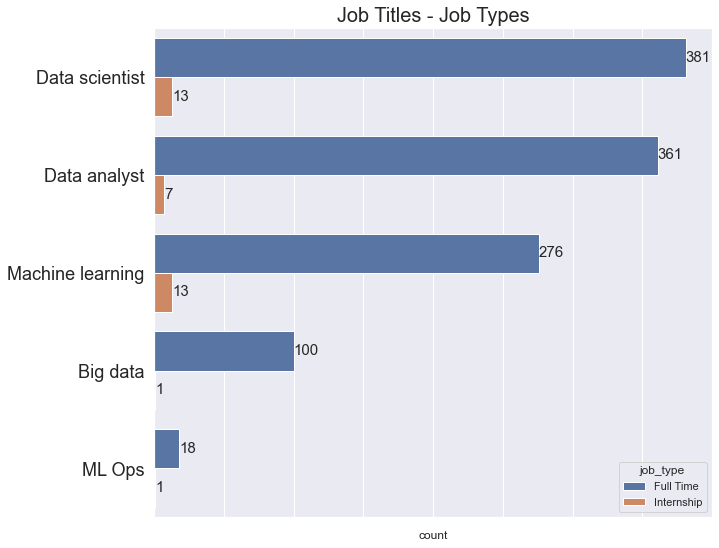

In [6]:
plt.figure(figsize = (10,9))
sns.set(style='darkgrid')
ax = sns.countplot(y = df['job_title'], hue = df['job_type'], order = df['job_title'].value_counts().index)
ax.set_title('Job Titles - Job Types', size = 20)
ax.set_ylabel('')
ax.set_xticklabels('')
ax.set_yticklabels(ax.get_yticklabels(), size = 18)
for bars in ax.containers:
    ax.bar_label(bars, size = 15)

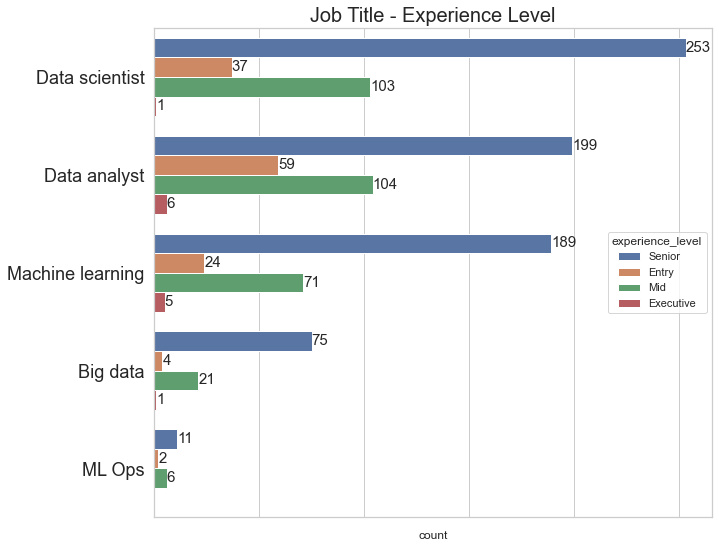

In [7]:
plt.figure(figsize = (10,9))
sns.set(style='whitegrid')
ax = sns.countplot(y = df['job_title'], hue = df['experience_level'], order = df['job_title'].value_counts().index)
ax.set_title('Job Title - Experience Level', size = 20)
ax.set_ylabel('')
ax.set_yticklabels(ax.get_yticklabels(), size = 18)
ax.set_xticklabels('')
for bars in ax.containers:
    ax.bar_label(bars, size = 15)

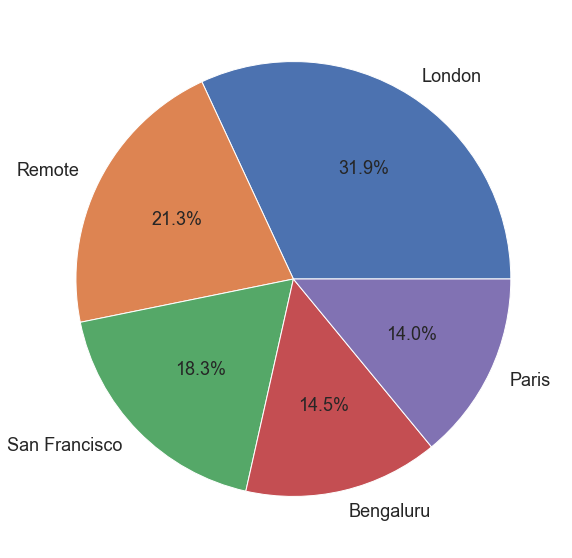

In [8]:
top5_locations = df['location'].value_counts().head(5)

plt.figure(figsize = (10,10))
plt.pie(top5_locations.values, labels = top5_locations.index, autopct='%.1f%%', textprops={'fontsize': 18})
plt.show()

In [9]:
df['salary'][df['salary_currency'] == 'EUR'] = df['salary'][df['salary_currency']=='EUR'] * 1.06
df['salary'][df['salary_currency'] == 'GBP'] = df['salary'][df['salary_currency']=='GBP'] * 1.21
df.drop('salary_currency', axis=1, inplace=True)

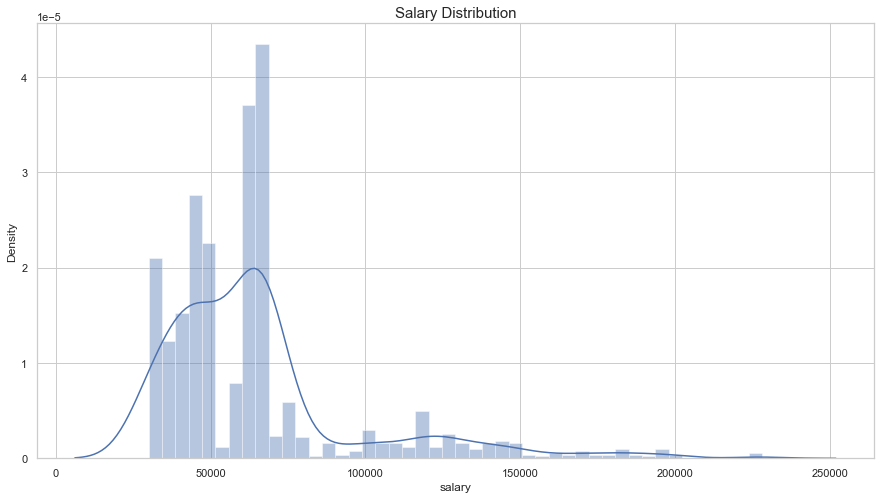

In [10]:
plt.figure(figsize = (15,8))
ax = sns.distplot(df['salary'])
ax.set_title('Salary Distribution', size = 15)
plt.show()

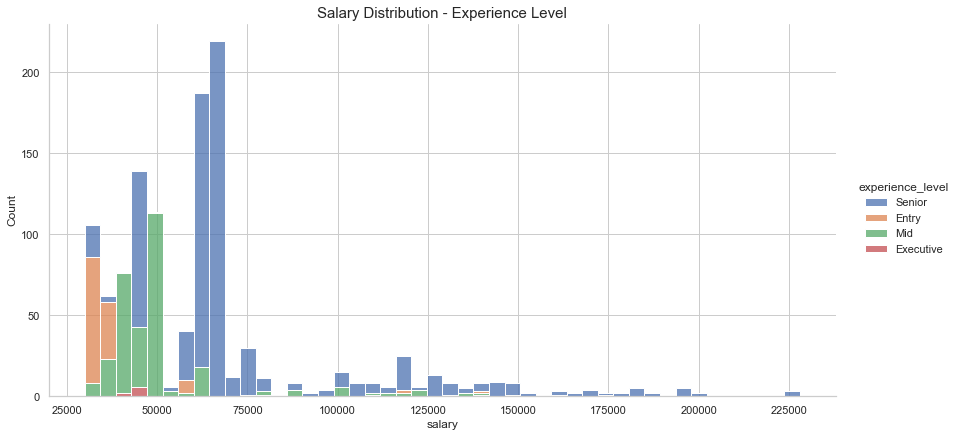

In [11]:
ax = sns.displot(data = df, x = 'salary', hue = 'experience_level', multiple = 'stack', height = 6, aspect = 2)
plt.title('Salary Distribution - Experience Level', size = 15)
plt.show()